In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [2]:
Image_Size= 256
Batch_Size=32
channels=3
EPOCHS=10


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size = Batch_Size
    
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

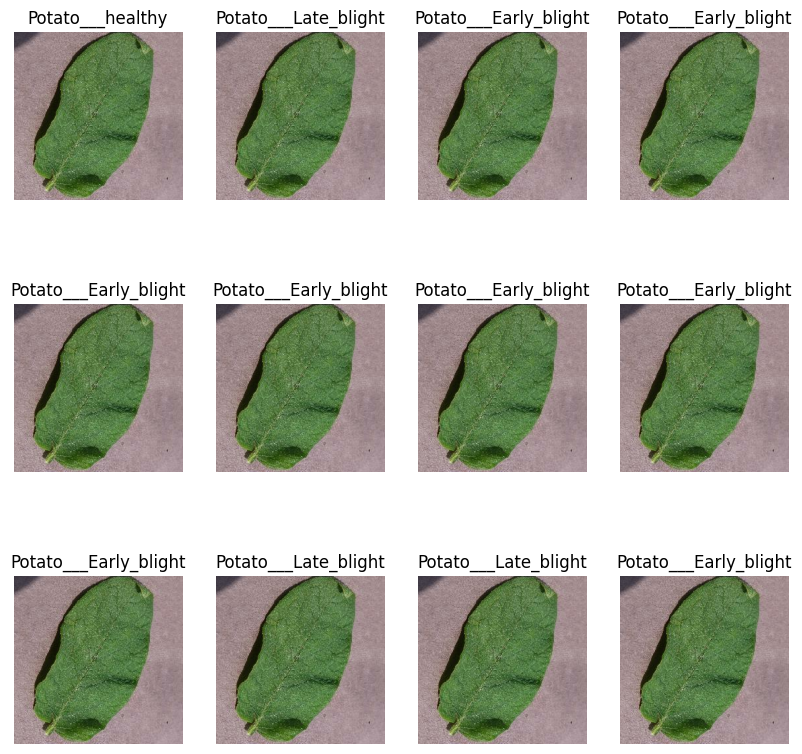

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [9]:
train_dataset=dataset.take(54)
len(train_dataset)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [11]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    ])

In [16]:
data_agumentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    ])

In [17]:
input_shape=(Batch_Size,Image_Size,Image_Size,channels)
n_classes=3

In [18]:
model= models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape =(Image_Size,Image_Size)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
  
])
model.build(input_shape=input_shape)


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history= model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 173s 3s/step - loss: 0.9495 - accuracy: 0.4572 - val_loss: 0.9018 - val_accuracy: 0.4792
Epoch 2/10
54/54 [==============================] - 187s 3s/step - loss: 0.8602 - accuracy: 0.5145 - val_loss: 0.8038 - val_accuracy: 0.6302
Epoch 3/10
54/54 [==============================] - 163s 3s/step - loss: 0.7970 - accuracy: 0.6128 - val_loss: 0.6493 - val_accuracy: 0.6979
Epoch 4/10
54/54 [==============================] - 161s 3s/step - loss: 0.5408 - accuracy: 0.7639 - val_loss: 0.5978 - val_accuracy: 0.7292
Epoch 5/10
54/54 [==============================] - 155s 3s/step - loss: 0.4408 - accuracy: 0.8027 - val_loss: 0.4182 - val_accuracy: 0.8021
Epoch 6/10
54/54 [==============================] - 158s 3s/step - loss: 0.3801 - accuracy: 0.8368 - val_loss: 0.3130 - val_accuracy: 0.8542
Epoch 7/10
54/54 [==============================] - 157s 3s/step - loss: 0.3233 - accuracy: 0.8698 - val_loss: 0.2688 - val_accuracy: 0.8750
Epoch 8/10
54

In [22]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 11s 665ms/step - loss: 0.3936 - accuracy: 0.8922


In [23]:
scores

[0.39358994364738464, 0.892241358757019]